<a href="https://colab.research.google.com/github/RayLeywin/Computational-Intelligence/blob/main/Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AdalineGD(object):
  """ADAptive LInear NEuron classifier.
  Parameters
  ----------------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.
  random_state : int
    Random number generator seed for random weight
    initialization.
  Attributes
  ----------------------
  w_ : 1d-array
    Weights after fitting.
  cost_ : list
    Sum-of-squares cost function value in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    """Fit training data.
    Parameters
    --------------------
    X : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples is the number of samples and
      n_features is the number of features.
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    --------------------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """Compute linear activation"""
    return X

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

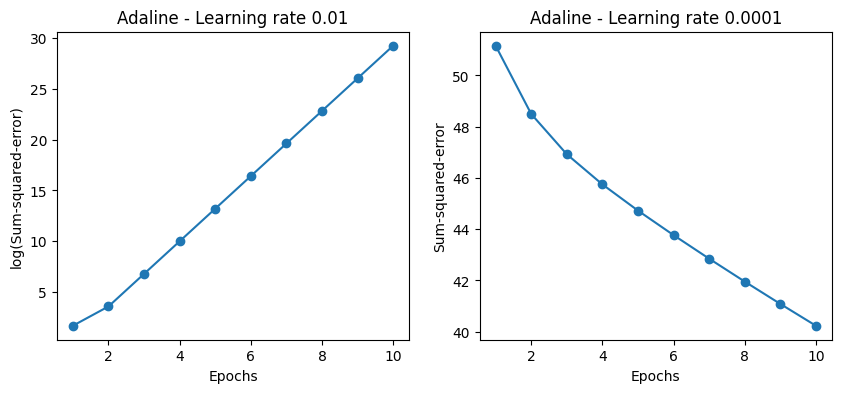

In [ ]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df.tail()
import matplotlib.pyplot as plt
#select setosa and versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
#extract sepal length and petal length
X=df.iloc[0:100,[0,2]].values
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y) # Replace X, y with your data
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2=AdalineGD(n_iter=10, eta=0.0001).fit(X, y) # Replace X, y with your data
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Stochastic gradient descent

In [ ]:
class AdalineSGD(object):
  """ADAptive LInear NEuron classifier.
  Parameters
  ----------------------
  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter : int
    Passes over the training dataset.
  shuffle : bool (default: True)
  random_state : int
    Random number generator seed for random weight
    initialization.
  Attributes
  ----------------------
  w_ : 1d-array
    Weights after fitting.
  cost_ : list
    Sum-of-squares cost function value averaged over all
    training samples in each epoch.
  """
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state
  def fit(self, X, y):
    """Fit training data.
    Parameters
    ----------------------
    X : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples is the number of samples and
      n_features is the number of features
    y : array-like, shape = [n_examples]
      Target values.

    Returns
    ---------------------
    self : object
    """

    self. _initialize_weights (X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X,y = self._shuffle(X,y)
      cost = []
      for xi, target in zip(X,y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self
    def partial_fit(self, X, y):
      """Fit training data without reinitializing the weights"""
      if not self.w_initialized:
        self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
        for xi,target in zip(X, y):
          self._update_weights(xi, target)
      else:
        self._update_weights(X, y)
      return self
    def _shuffle(self, X, y):
      """Shuffle training data"""
      r = self.rgen.permutation(len(y))
      return X[r], y[r]

    def _initialize_weights(self, m):
      """Initialize weights to small random numbers"""
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
      self.w_initialized = True
    def _update_weights(self, xi, target):
      """Apply Adaline learning rule to update the weights"""
      output = self.activation(self.net_input(xi))
      error = (target - output)
      self.w_[1:] += self.eta * xi.dot(error)
      self.w_[0] += self.eta * error
      cost = 0.5 * error**2
      return cost

    def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
      """Compute linear activation"""
      return X
    def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)